In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('4.01_healthcare.csv')

In [4]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [7]:
data.shape

(90569, 28)

## ChiSquare test
### For independence of categorical variables

- _Chi-square test_ is used to determine if there is a significant relationship between two nominal (categorical) variables. It works with nominal categorical variables well and not well ordinal categorical variables as the test is based on a contingency table (as we would see later) and the order in which frequencies are put in the table, does not change the result of the chi-square test.

In the contingency table, the frequency of each category for one nominal variable is compared across the frequencies of categories of the second nominal variable. Here is the code to show how to check the contingency table in Python:

In [5]:

# contingency table
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins = False)
data_crosstab


RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
DOMAIN,,,,,,,,,,,,,,
,156,595,281,134,248,129,61,169,95,33,98,92,50,35
C1,249,1842,926,283,689,328,114,421,230,113,210,219,108,61
C2,413,2415,1002,436,916,383,205,640,277,153,434,318,163,79
C3,300,1620,605,298,558,199,155,410,166,54,319,228,106,38
R1,62,419,185,52,157,72,26,113,52,24,50,37,24,12
R2,782,4041,1532,778,1472,597,397,1060,480,190,742,535,286,114
R3,311,1486,441,280,488,178,165,380,143,53,319,200,93,35
S1,410,3627,1884,411,1231,695,198,751,438,193,368,344,208,108
S2,396,2631,1016,401,995,312,184,673,332,126,383,346,191,68


- Based on the data in the contingency table we calculate the expected value of the nominal variables. Based on the expected values, the _chi-square test_ statistic is calculated which helps us decide on whether the variables are independent or not. Technically, though the value of the test statistic we are trying to prove or disprove some hypotheses on the independence of categorical variables.

- `H0` (_Null Hypothesis_) - assumes that there is no association between the two variables.
- `Ha` (_Alternate Hypothesis_) - assumes that there is an association between the two variables.

### Working with the established hypothesis

- If the observed chi-square test statistic is greater than the critical value (this value is known already based on certain parameters) in the data, the null hypothesis can be rejected.
- If the observed chi-square test statistic is lower than the critical value (this value is known already based on certain parameters) in the data, the null hypothesis is accepted (also put as we fail to reject the null hypothesis) ie. based on the statistics we either reject `H0` or we fail to reject `H0`. You can also use the `p` value directly as we will see later in the lesson.


- Three important values that we measure in order to calculate the Chi-square test statistic are:

      - Degrees of freedom `(r-1)*(c-1)` where `r` is the number of rows and `c` is the number of columns
      - Actual frequencies
      - Expected frequencies

- Based on these values we calculate the test statistic that helps us determine if we reject or fail to reject the null hypothesis.


In [11]:
data_crosstab.shape

(17, 14)

In [6]:
from scipy.stats import chi2_contingency
chi2_contingency(data_crosstab, correction=False)

(1397.7553798894764,
 3.3725088859824856e-175,
 208,
 array([[ 112.12878579,  701.72390111,  288.47875101,  112.46514812,
          249.82110877,  105.95413442,   54.46667182,  174.04348066,
           80.53475251,   34.23688017,  106.89114377,   87.62238735,
           46.87449348,   20.75836103],
        [ 298.5119743 , 1868.14639667,  767.99513078,  299.40744626,
          665.0798176 ,  282.07366759,  145.00249534,  463.34277733,
          214.40157228,   91.14625313,  284.56819662,  233.27044574,
          124.79041394,   55.26341243],
        [ 403.68424074, 2526.33503737, 1038.57653281,  404.89520697,
          899.40191456,  381.45436076,  196.09003081,  626.58852367,
          289.93991322,  123.25906215,  384.82776668,  315.45670152,
          168.75679316,   74.73391558],
        [ 260.53453168, 1630.47612318,  670.28886264,  261.31607945,
          580.4666939 ,  246.18754762,  126.55491393,  404.39514624,
          187.12486612,   79.55039804,  248.3647164 ,  203.59319414,

This returns 4 results in this order (_chi-square_ statistic, _p_ value, degrees of freedom, expected frequencies matrix). Looking at the _p_ value, it is usually compared against 0.05. We will talk about _p_ value later but now we will just use this to decide on the variables directly.

Since in this case, the _p_ value is less than 0.05 we can reject the null hypothesis (that there is no relationship between the two categorical variables); ie. there is a correlation between the two variables. Hence we can drop one of the two columns. In this case, we are going to drop the column `RFA_2`.

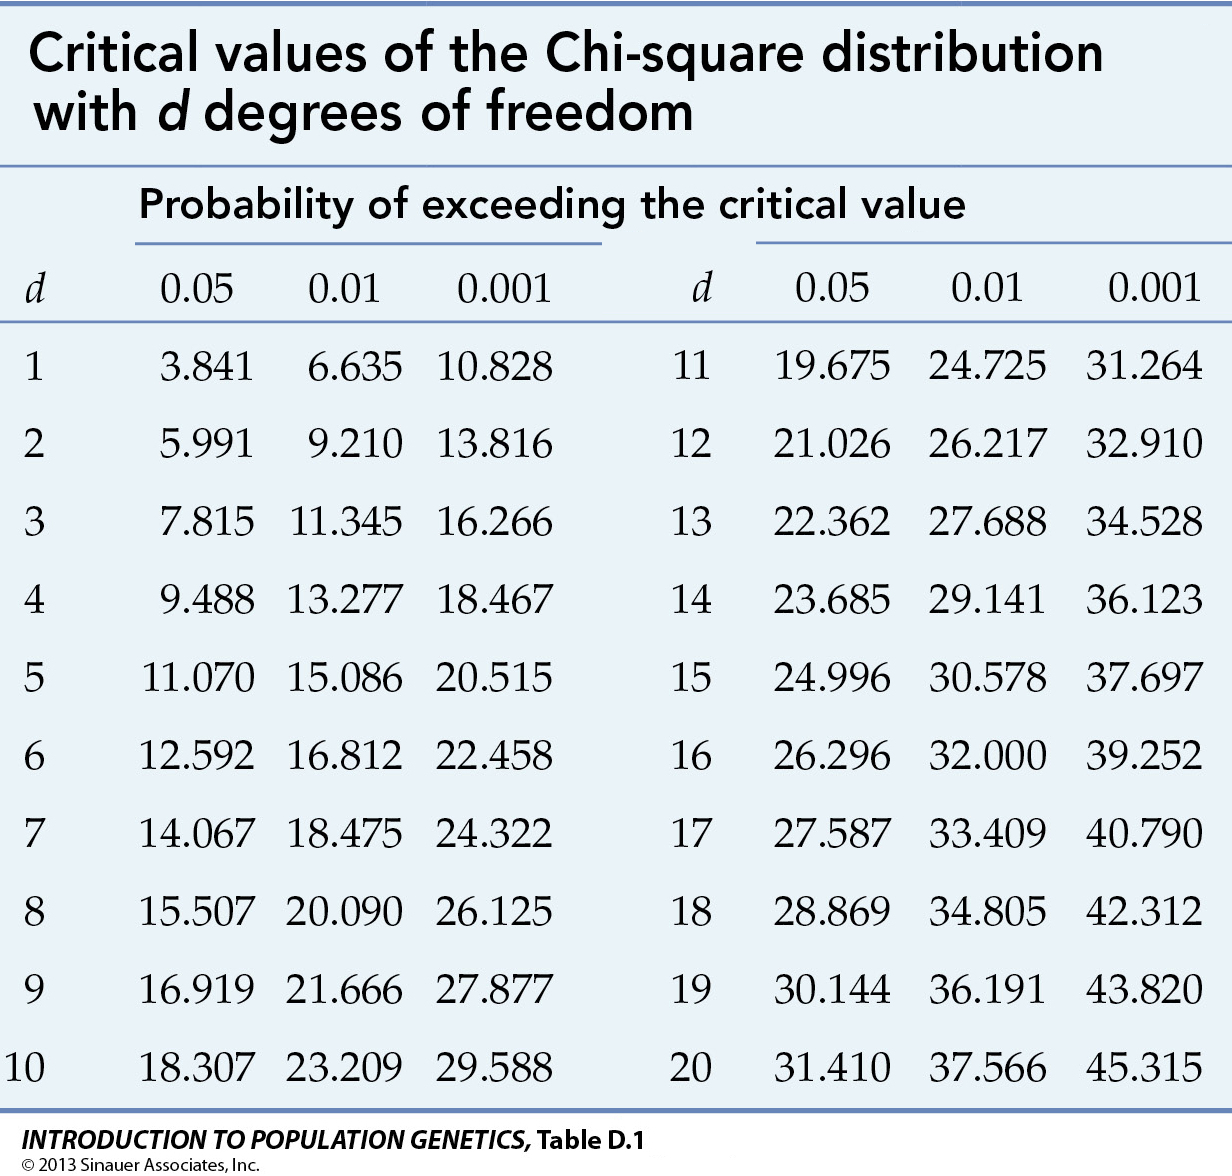

In [16]:
from IPython import display
display.Image("https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg", width=500, height=500)

**How to calculate chisquare test on your own [here](https://www.youtube.com/watch?v=f53nXHoMXx4&ab_channel=VectorsAcademy)**

## Data Scaling techniques

- `Standard scaler`: Removes the mean and scales the data to unit variance. For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
- `Min-max scaler`: It scales the data in the range of [0,1]. For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.
- `Normalize`: It rescales the vector to have a unit norm. This means that, for each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.


In [ ]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

In [ ]:
# Min-max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

In [ ]:
# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized

### Processing categorical data

In [12]:
# Cleaning categorical column DOMAIN

vals_domain = pd.DataFrame(data['DOMAIN'].value_counts())
vals_domain = vals_domain.reset_index()
vals_domain.columns = ['domain', 'counts']
group_vals_domain_df = vals_domain[vals_domain['counts']<5000]
group_vals_domain = list(group_vals_domain_df['domain'])
group_vals_domain

['T1', 'R3', 'U1', 'U2', 'U3', ' ', 'T3', 'S3', 'U4', 'R1']

In [ ]:
def clean_vals_domain(x):
    if x in group_vals_domain:
        return 'other'
    else:
        return x

data['DOMAIN'] = list(map(clean_vals_domain, data['DOMAIN']))

#### Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data[['DOMAIN']])
encoded = encoder.transform(data[['DOMAIN']]).toarray()
encoded

## KNN Algo
Questions?